# <p style="background-color:purple;font-family:newtimeroman;font-size:130%;color:white;text-align:center;border-radius:20px 20px;"><b>Boosting_(Ada_Gradient_XGBoosting_LightGBM_Classifier) </b></p>

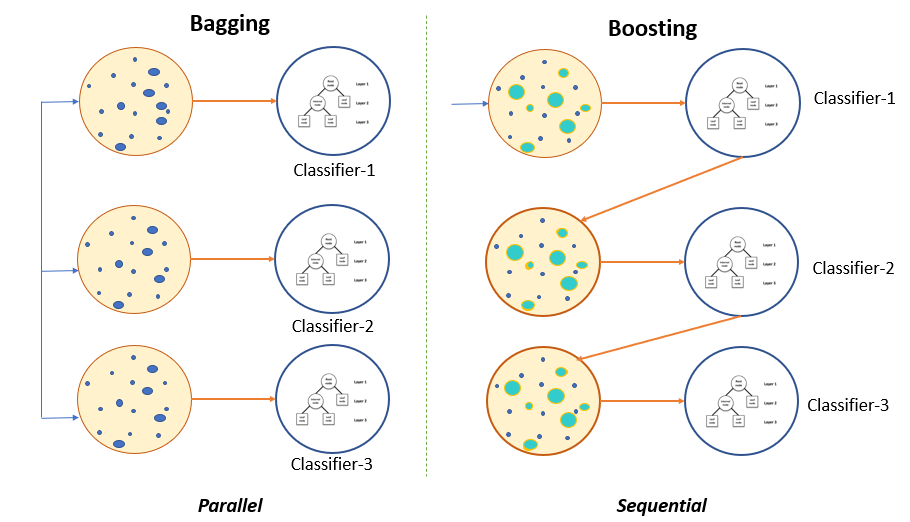

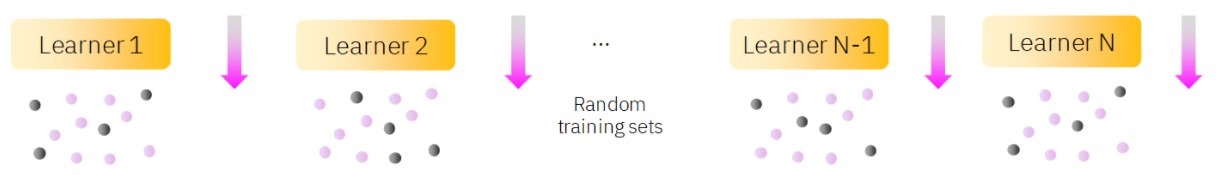
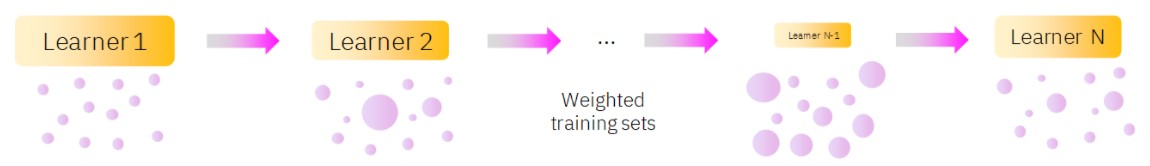

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

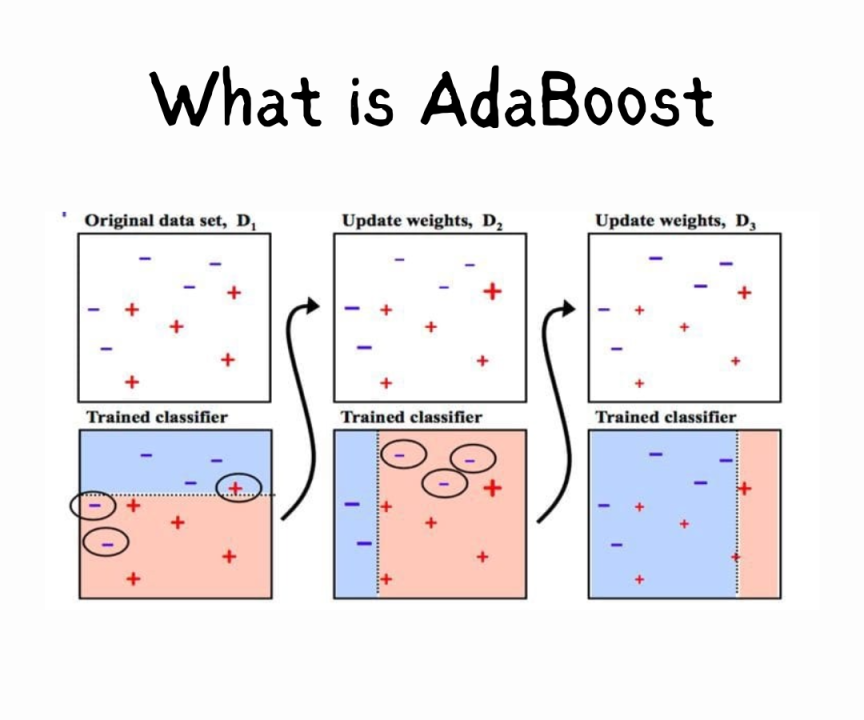

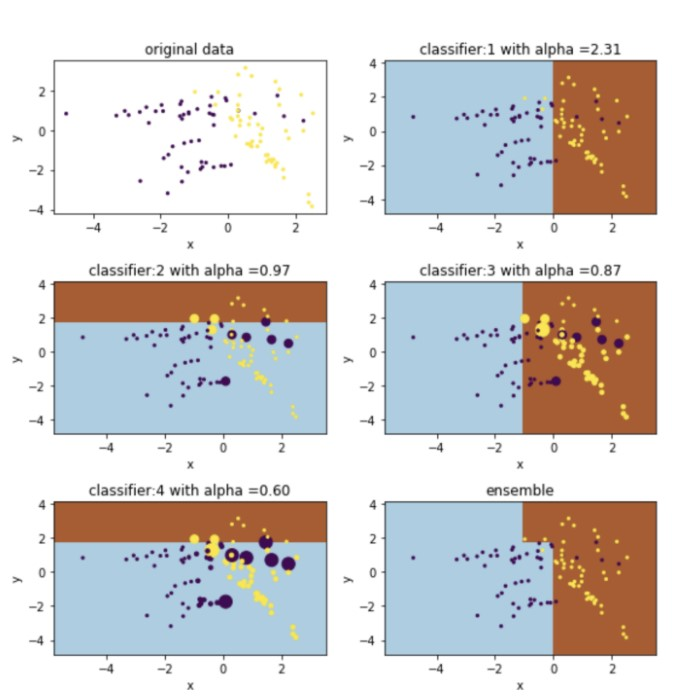

**About Dataset**

**Reklamlara Tıklama Tahmini Yapacak Makine Öğrenimi Modeli**


* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

**------------------------------------------------------------------------------------------**


- 'Daily Time Spent on Site': Kullanıcının sitede geçirdiği süre (dakika cinsinden)
- 'Age': Kullanıcının yaşı (yıl cinsinden)
- 'Area Income': Kullanıcının bulunduğu coğrafi alanın ortalama geliri
- 'Daily Internet Usage': Kullanıcının günde internet üzerinde geçirdiği ortalama süre (dakika cinsinden)
- 'Ad Topic Line': Reklamın başlığı
- 'City': Kullanıcının bulunduğu şehir
- 'Male': Kullanıcının erkek olup olmadığı
- 'Country': Kullanıcının ülkesi
- 'Timestamp': Kullanıcının reklama tıkladığı veya pencereyi kapattığı zaman
- 'Clicked on Ad': Reklama tıklama durumu (0 veya 1)

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("advertising2.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [4]:
df.shape

(1000, 10)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.00,65.00,15.85,32.60,51.36,68.22,78.55,91.43
Age,1000.00,36.01,8.79,19.00,29.00,35.00,42.00,61.00
Area Income,1000.00,55000.00,13414.63,13996.50,47031.80,57012.30,65470.63,79484.80
Daily Internet Usage,1000.00,180.00,43.90,104.78,138.83,183.13,218.79,269.96
Male,1000.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
Clicked on Ad,1000.00,0.50,0.50,0.00,0.00,0.50,1.00,1.00


In [6]:
df["Clicked on Ad"].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [7]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [8]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: Ad Topic Line
------------------------------
Unique Values (1000): ['Cloned 5thgeneration orchestration' 'Monitored national standardization'
 'Organic bottom-line service-desk'
 'Triple-buffered reciprocal time-frame' 'Robust logistical utilization'
 'Sharable client-driven software' 'Enhanced dedicated support'
 'Reactive local challenge' 'Configurable coherent function'
 'Mandatory homogeneous architecture' 'Centralized neutral neural-net'
 'Team-oriented grid-enabled Local Area Network'
 'Centralized content-based focus group'
 'Synergistic fresh-thinking array' 'Grass-roots coherent extranet'
 'Persistent demand-driven interface' 'Customizable multi-tasking website'
 'Intuitive dynamic attitude'
 'Grass-roots solution-oriented conglomeration'
 'Advanced 24/7 productivity' 'Object-based reciprocal knowledgebase'
 'Streamlined non-volatile analyzer'
 'Mandatory disintermediate utilization'
 'Future-proofed methodical protocol' 'Exclusive neutral parallelism'
 'Public-key for

In [9]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(feature, df[feature].nunique())

Ad Topic Line 1000
City 969
Country 237
Timestamp 1000


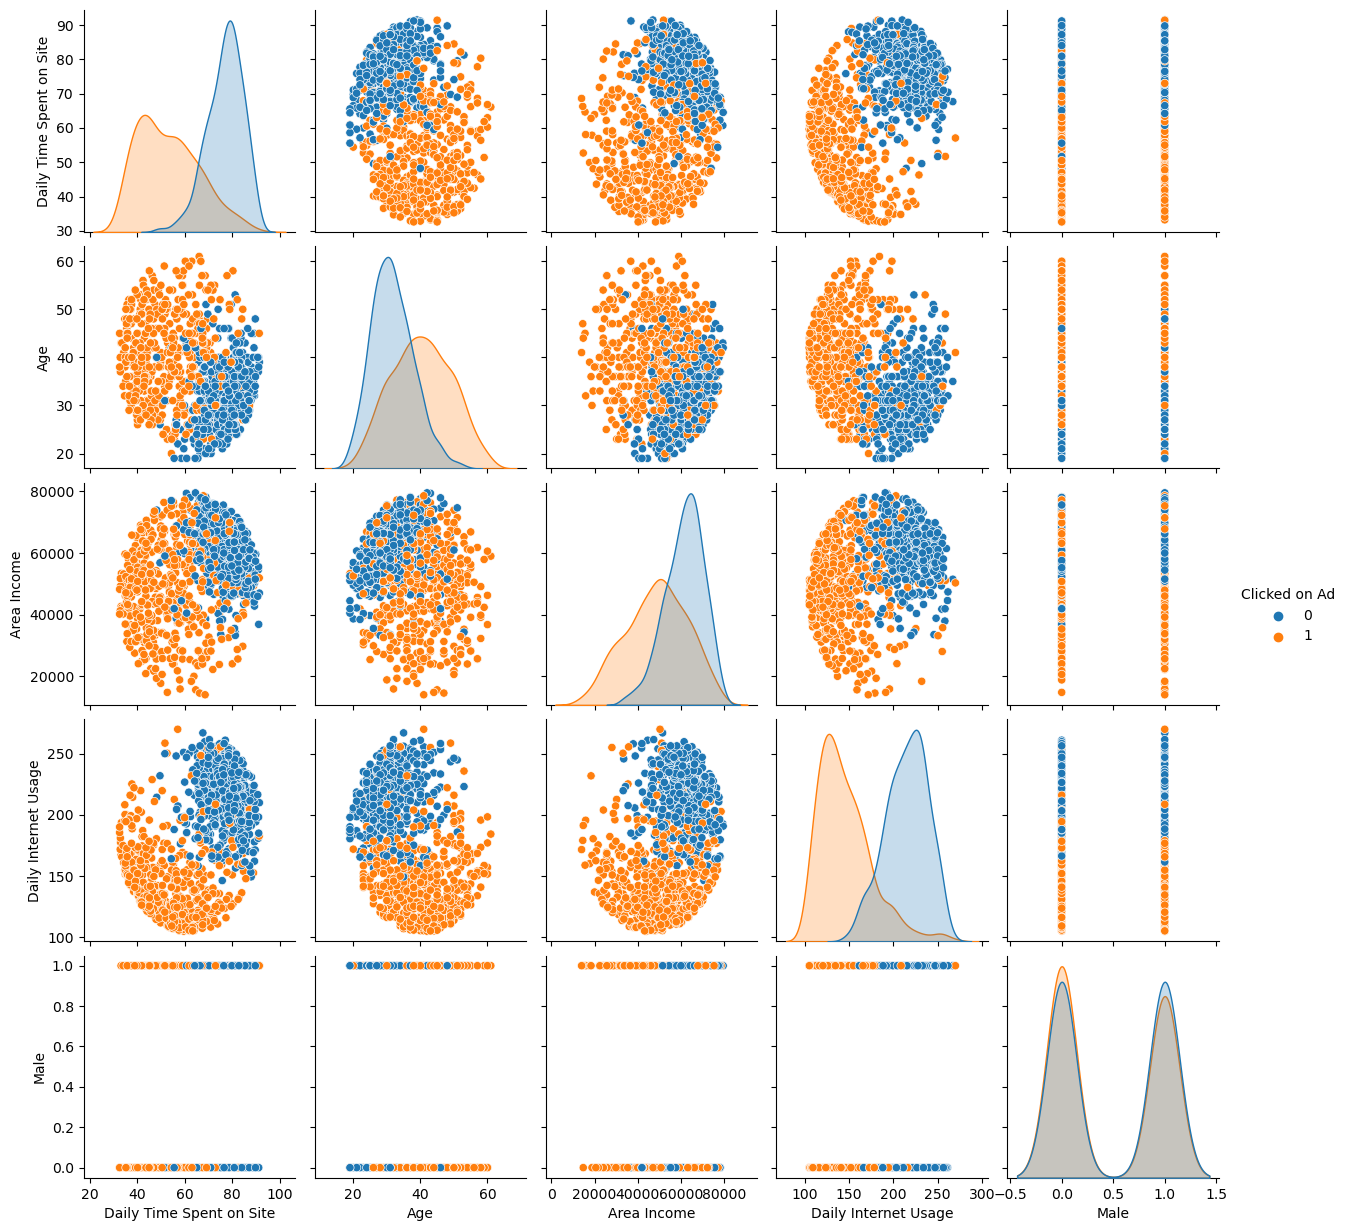

In [10]:
sns.pairplot(df,hue="Clicked on Ad");

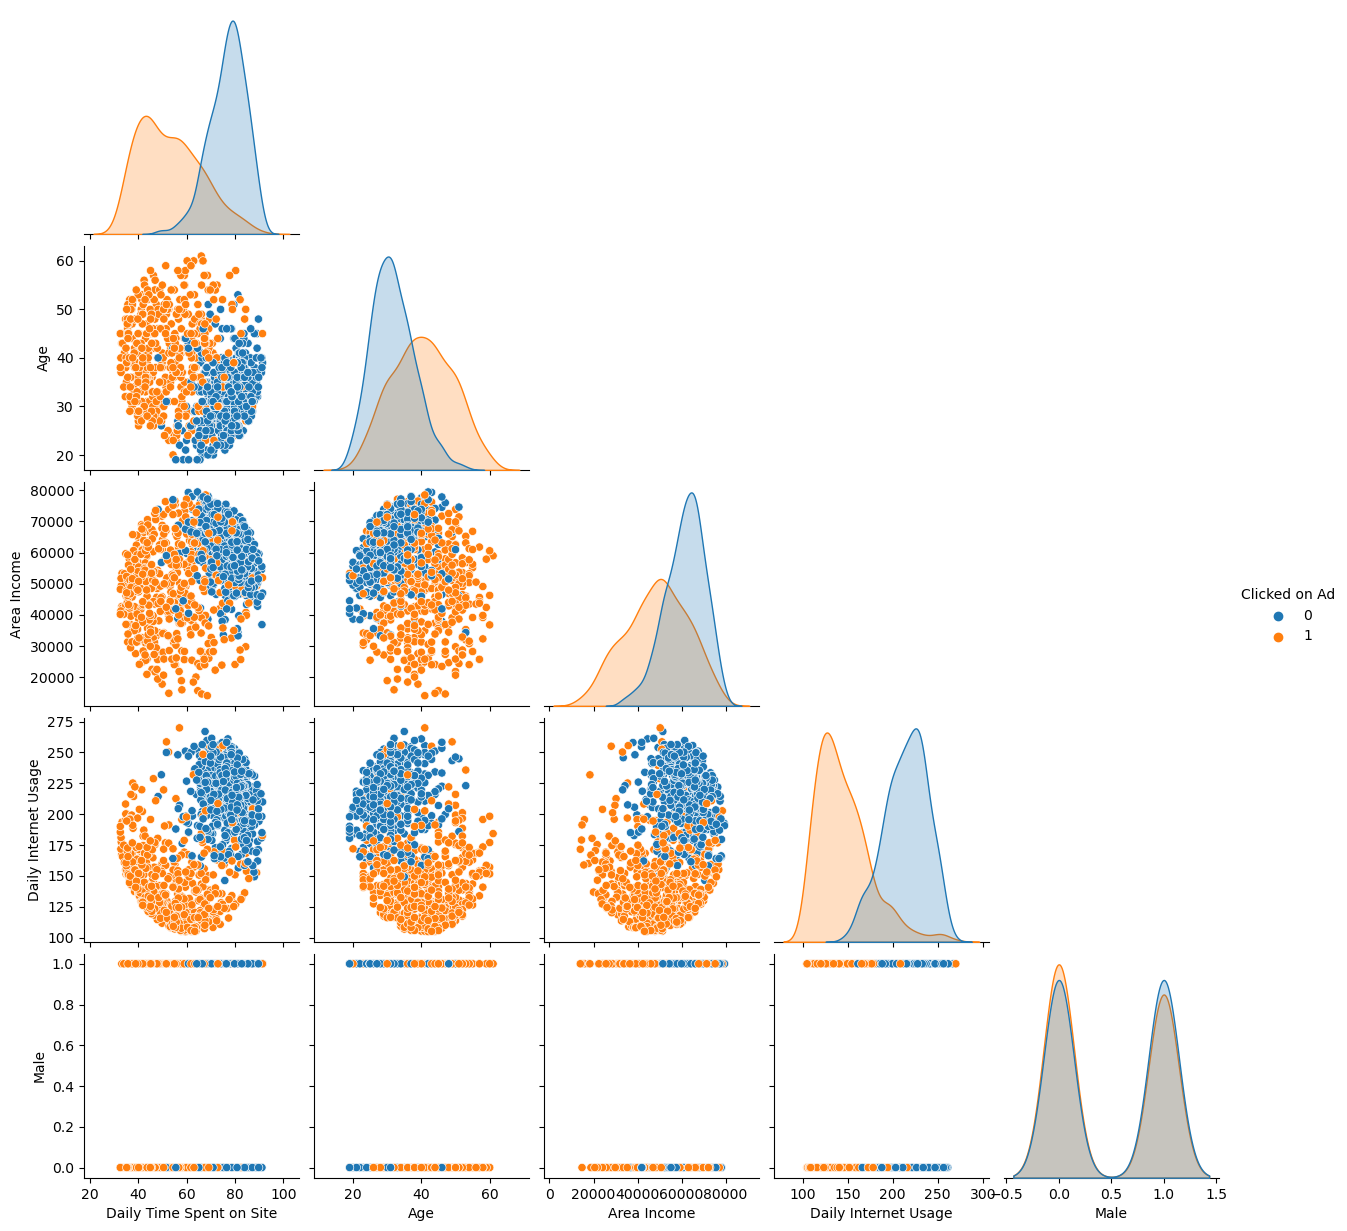

In [11]:
sns.pairplot(df,hue="Clicked on Ad", corner=True);

# Modelling

## Train | Test Split

In [12]:
X = df[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]]
y = df["Clicked on Ad"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=42)

## AdaBoost Modelling and Model Performance

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [16]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [17]:
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

#base_estimator=DecisionTreeClassifier(max_depth=1)

In [18]:
# ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

In [19]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [20]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[454   2]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [21]:
from sklearn.model_selection import cross_val_score, cross_validate

model = AdaBoostClassifier(n_estimators=50, random_state=42)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision", "recall", "f1"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.96
train_accuracy    0.99
test_precision    0.97
train_precision   1.00
test_recall       0.95
train_recall      0.97
test_f1           0.96
train_f1          0.99
dtype: float64

In [22]:
from sklearn.tree import plot_tree

In [23]:
model = AdaBoostClassifier(n_estimators=3, random_state=42)

# sadece 3 agaç görselleştirip çalışma mantığına değineceğiz.

In [24]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

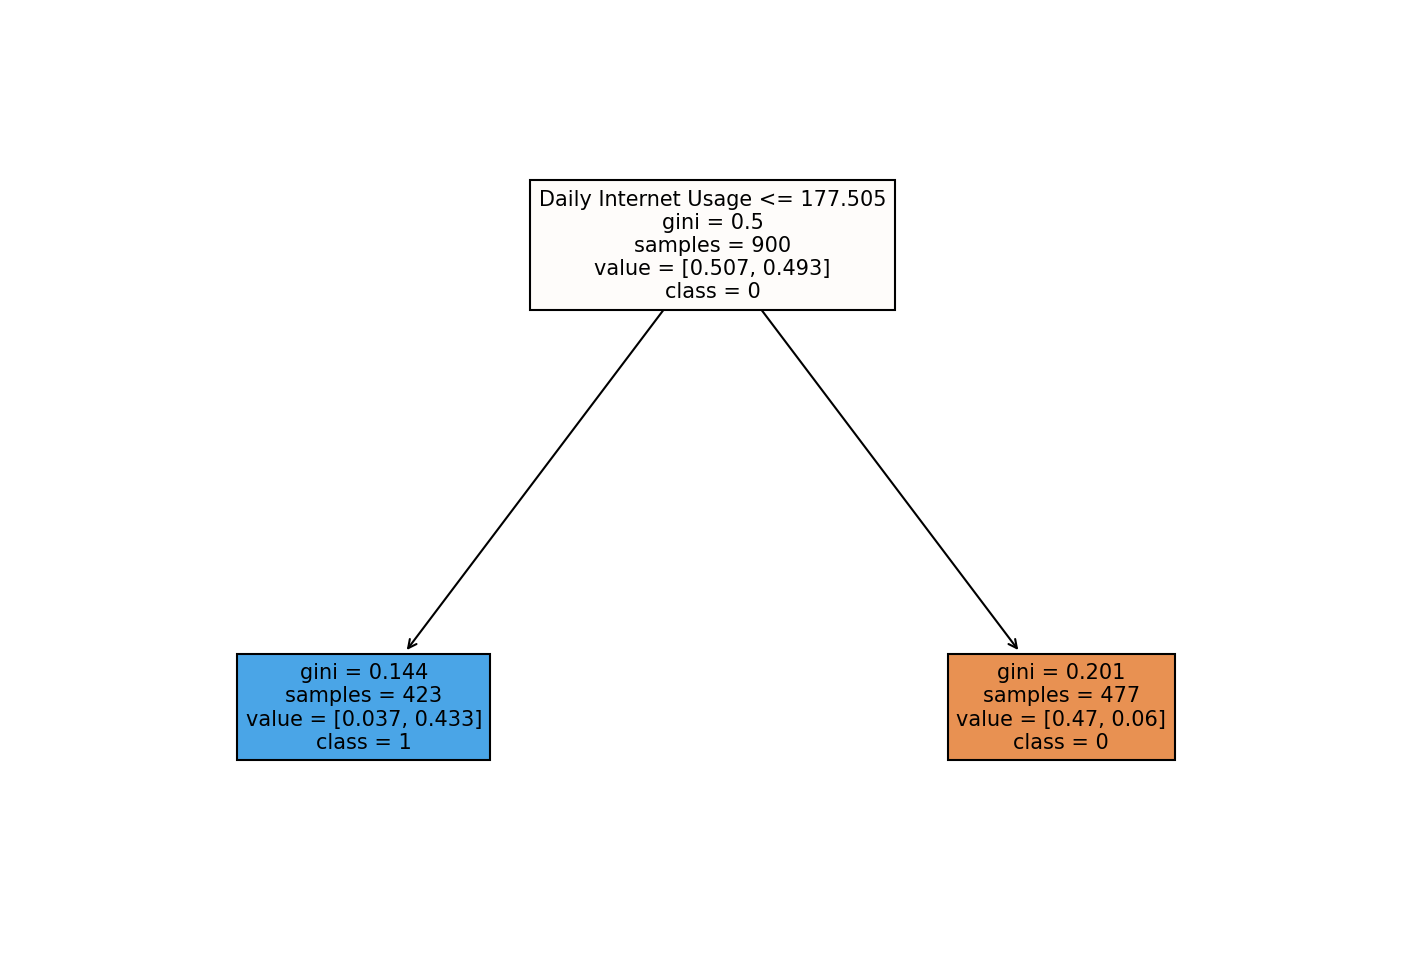

In [25]:
targets = df["Clicked on Ad"].astype("str")
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[0],
          filled=True,
          feature_names=X.columns.to_list(),
          class_names=targets.unique().tolist(),
          fontsize=10);

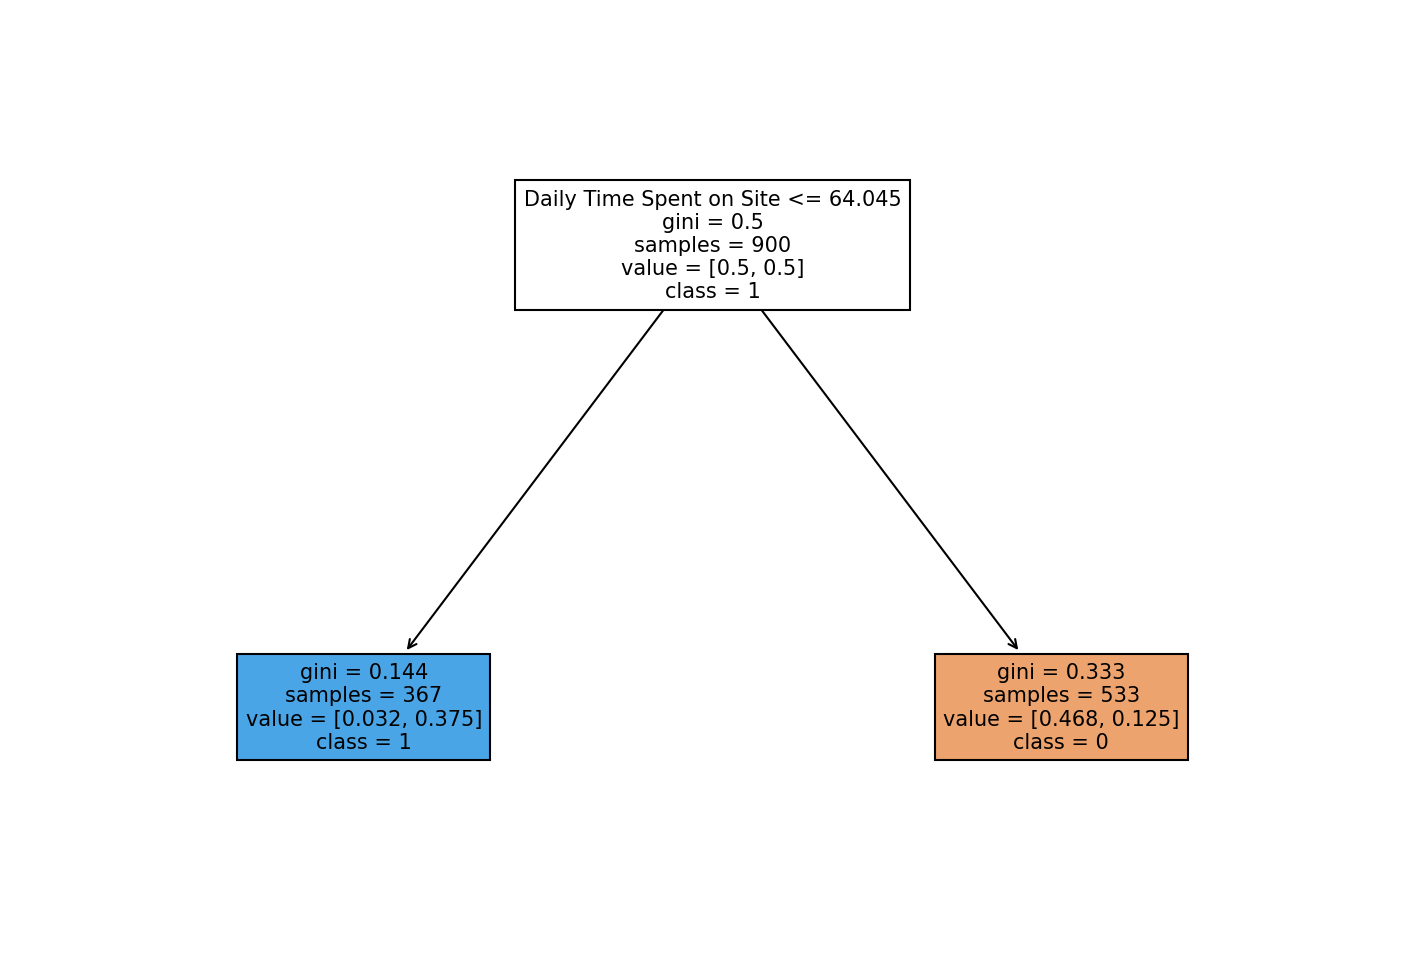

In [26]:
targets = df["Clicked on Ad"].astype("str")
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[1],
          filled=True,
          feature_names=X.columns.to_list(),
          class_names=targets.unique().tolist(),
          fontsize=10);

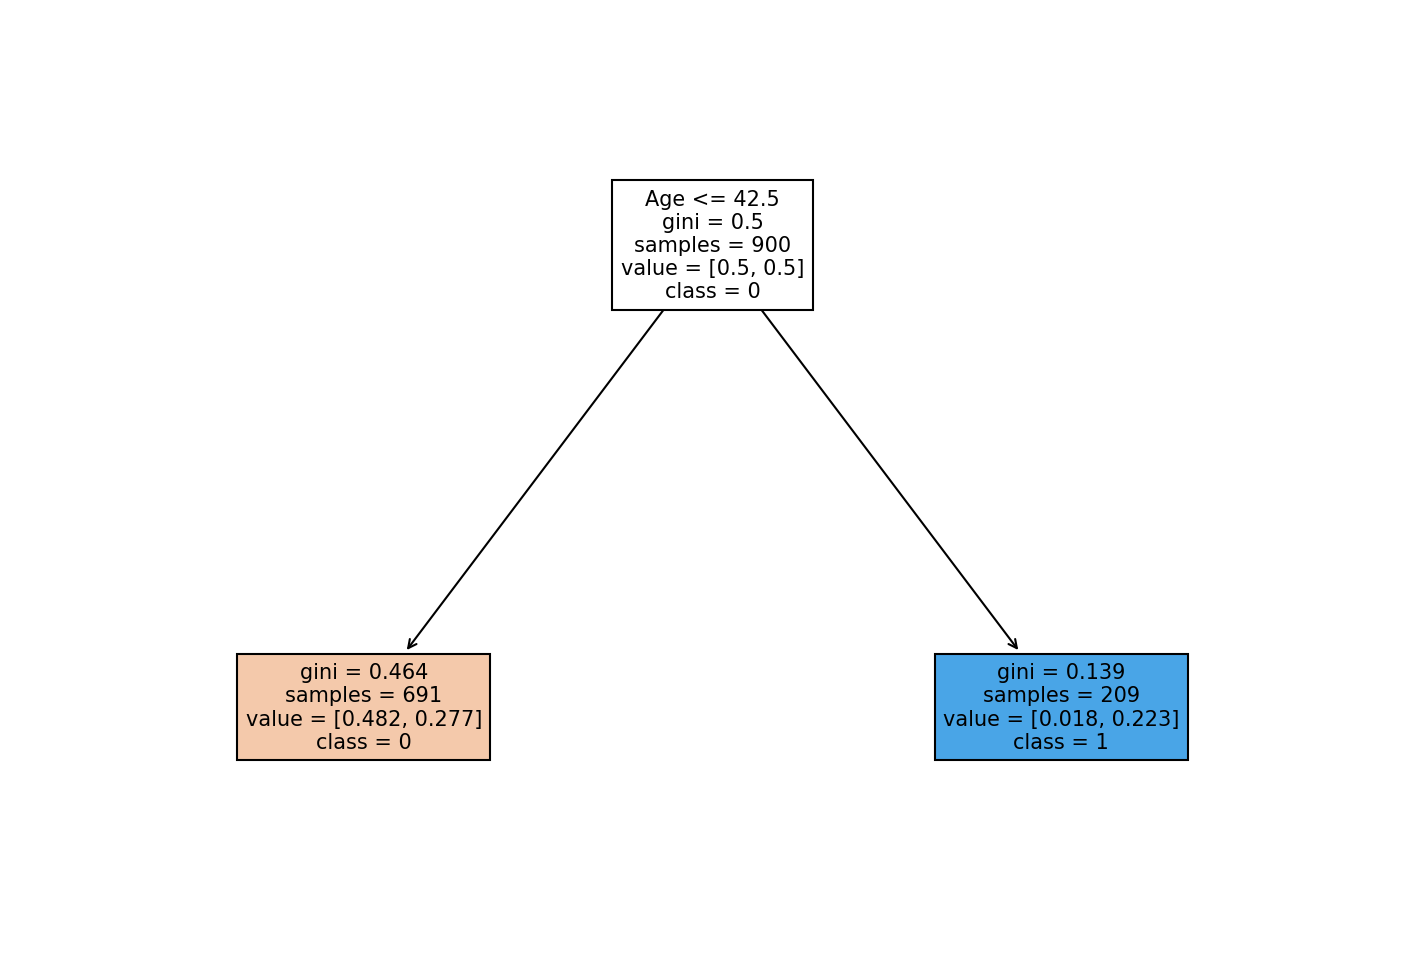

In [27]:
targets = df["Clicked on Ad"].astype("str")
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[2],
          filled=True,
          feature_names=X.columns.to_list(),
          class_names=targets.unique().tolist(),
          fontsize=10);

In [28]:
# Daily Time Spent on Site       68.95
# Age                            35.00
# Area Income                 61833.90
# Daily Internet Usage          170.00
# Male     

# 1. ağaç 1 sınıfı
# 2. ağaç 0 sınıfı
# 3. ağaç 0 sınıfı

In [29]:
df.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0


In [30]:
model.estimator_errors_

# 1.ağacın hatası: 0.09666667
# 2.ağacın hatası: 0.15660636
# 3.ağacın hatası: 0.29526371

array([0.09666667, 0.15660636, 0.29526371])

In [31]:
error_rates = []

for n in range(1,300):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test,preds)
    
    error_rates.append(err)

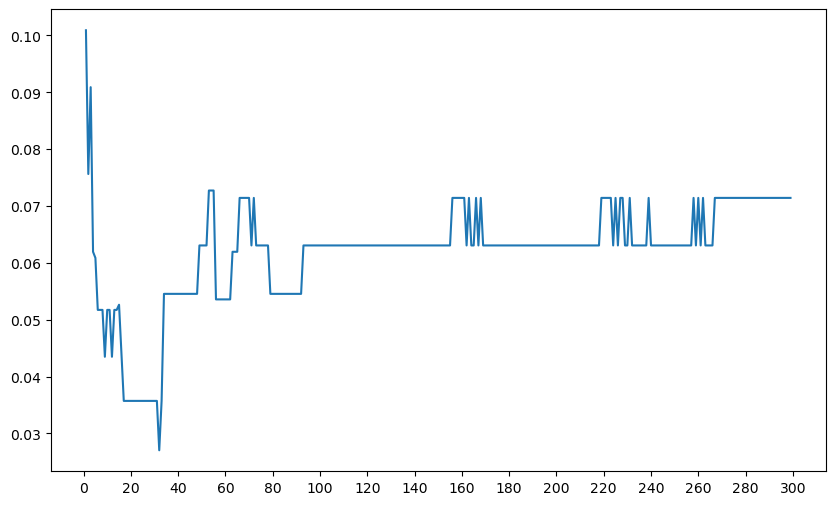

In [32]:
plt.plot(range(1,300), error_rates)
plt.xticks(range(0, 301, 20));

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
model = AdaBoostClassifier(random_state=42)

In [35]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.5, 1]
}

In [36]:
ada_grid_model = GridSearchCV(model, param_grid, cv=5, scoring="f1")

In [37]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [38]:
ada_grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [39]:
ada_grid_model.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [40]:
ada_grid_model.best_score_

0.969132103588408

In [41]:
y_pred = ada_grid_model.predict(X_test)
y_pred_proba = ada_grid_model.predict_proba(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred_proba[:,1])
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[453   3]
 [ 18 426]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



### Feature_Importances

In [42]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance", ascending = False)
ada_imp_feats

,ada_importance
Daily Internet Usage,0.29
Daily Time Spent on Site,0.28
Age,0.22
Area Income,0.21
Male,0.00


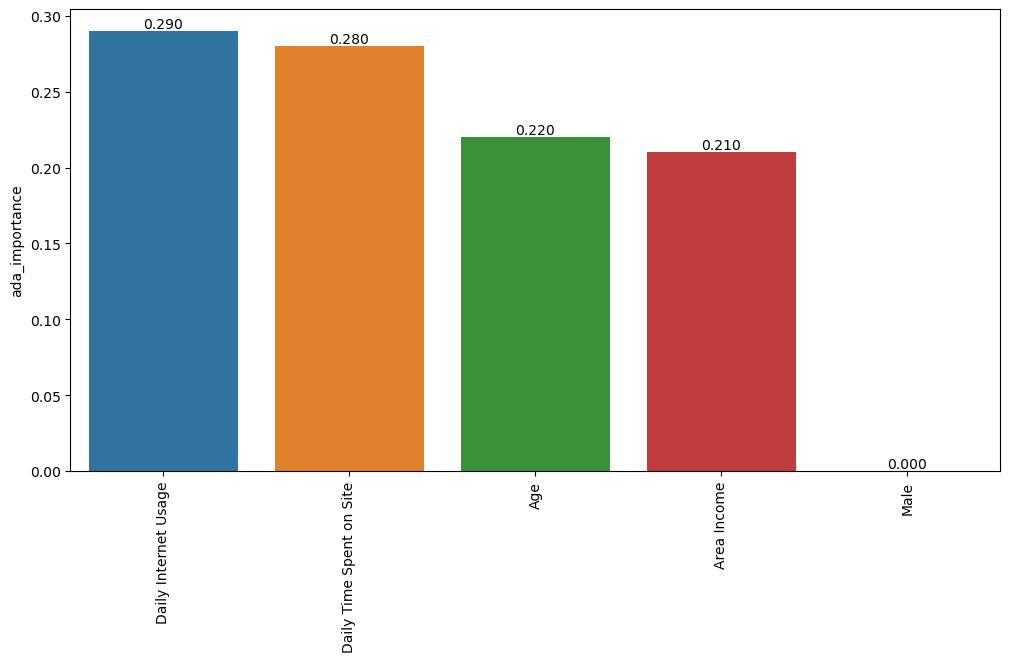

In [43]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

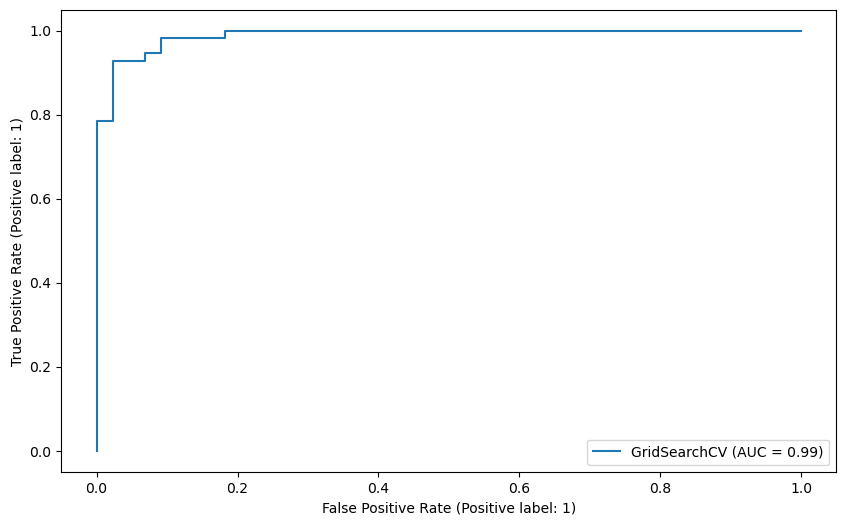

In [44]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(ada_grid_model, X_test, y_test);

## Gradient Boosting Modelling and Model Performance

In [45]:
np.log(4/2)

# 1 olma olasılığı 

0.6931471805599453

In [46]:
tah_ol=(np.e**np.log(4/2)) /(1+np.e**np.log(4/2))
tah_ol

#residual = gerçek değer - tahmin edilen olasılık

0.6666666666666666

In [47]:
1-tah_ol # 1 olma olasılığındaki residual

0.33333333333333337

In [48]:
0-tah_ol # 0 olma olasılığındaki residual

-0.6666666666666666

In [49]:
tah_ol + (0.1*0.33) + (0.1*0.13) + (0.1*0.1) # ikinci weak learner 1. Gözlem için # 0.1: learning rate

0.7226666666666667

In [50]:
tah_ol + (0.1*-0.67) + (0.1*-0.44) + (0.1*-0.14)  # ikinci weak learner 3. Gözlem için  # 0.1: learning rate

0.5416666666666665

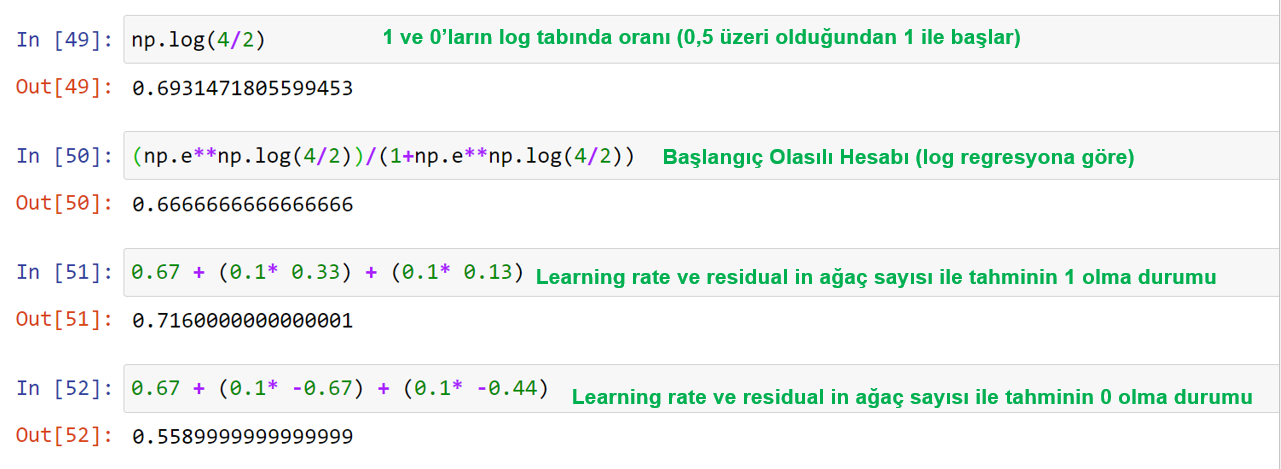

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
grad_model = GradientBoostingClassifier(random_state=42)

In [53]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [54]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[456   0]
 [  1 443]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [55]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(
    model,
    X_train,
    y_train,
    scoring=["accuracy", "precision", "recall", "f1", "roc_auc"],
    cv=10,
    return_train_score=True
)

df_scores = pd.DataFrame(scores, index=range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.95
train_accuracy    1.00
test_precision    0.96
train_precision   1.00
test_recall       0.95
train_recall      1.00
test_f1           0.95
train_f1          1.00
test_roc_auc      0.99
train_roc_auc     1.00
dtype: float64

In [56]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "subsample": [0.5, 0.8],
    "max_features": [None, 2, 3],
    "learning_rate": [0.01, 0.1, 0.5],
    "max_depth": [2, 3, 4]
}

In [57]:
gb_model = GradientBoostingClassifier(random_state=42)

In [58]:
grid = GridSearchCV(gb_model, param_grid, scoring= "f1", verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END learning_rate=0.01, max_depth=2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, max_features=None, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=2, max_features=None, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=2, max_features=None, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_

[CV] END learning_rate=0.01, max_depth=2, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=2, max_features=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=2, max_features=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=2, max_features=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=2, max_features=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=2, max_features=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=2, max_features=3, n_estimators=300, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=2, max_features=3, n_estimators=300, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=2, max_features=3, n_estimators=300, subsample=0.5; total time=   0.4s
[CV] END l

[CV] END learning_rate=0.01, max_depth=3, max_features=2, n_estimators=300, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=2, n_estimators=300, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, max_features=3, n_estimators=100, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, max_features=3, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, max_features=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, max_features=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END l

[CV] END learning_rate=0.01, max_depth=4, max_features=2, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, max_features=2, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, max_features=2, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, max_features=2, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, max_features=2, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=4, max_features=2, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, max_features=2, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, max_features=2, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, max_features=2, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END l

[CV] END learning_rate=0.1, max_depth=2, max_features=None, n_estimators=300, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=2, max_features=None, n_estimators=300, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=2, max_features=None, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=2, max_features=2, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, max_features=2, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, max_features=2, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, max_features=2, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=2, max_features=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END l

[CV] END learning_rate=0.1, max_depth=3, max_features=None, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, n_estimators=300, subsample=0.5; total time=

[CV] END learning_rate=0.1, max_depth=3, max_features=3, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, max_features=3, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, max_features=3, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=4, max_features=None, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=None, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=None, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=None, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, max_features=None, n_estimators=100, subsample=0.8; total time=   0.4s
[

[CV] END learning_rate=0.1, max_depth=4, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, max_features=3, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, max_features=3, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, max_features=3, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, max_features=3, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=4, max_features=3, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, max_features=3, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, max_features=3, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, max_features=3, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END learning_r

[CV] END learning_rate=0.5, max_depth=2, max_features=2, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=2, max_features=2, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=2, max_features=2, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=2, max_features=3, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=2, max_features=3, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=2, max_features=3, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=2, max_features=3, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=2, max_features=3, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=2, max_features=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_r

[CV] END learning_rate=0.5, max_depth=3, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=3, max_features=2, n_estimators=200, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=3, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=3, max_features=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=3, max_features=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=3, max_features=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=3, max_features=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=3, max_features=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=3, max_features=2, n_estimators=300, subsample=0.5; total time=   0.4s
[CV] END learning_r

[CV] END learning_rate=0.5, max_depth=4, max_features=None, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=4, max_features=None, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=4, max_features=None, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=4, max_features=2, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=4, max_features=2, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=4, max_features=2, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=4, max_features=2, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=4, max_features=2, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=4, max_features=2, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END l

In [59]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': None,
 'n_estimators': 100,
 'subsample': 0.8}

In [60]:
grid.best_score_

0.9659370340642017

In [61]:
y_pred = grid.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.93      0.96      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[453   3]
 [ 11 433]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       456
           1       0.99      0.98      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



### Feature Importances

In [62]:
model = GradientBoostingClassifier(learning_rate=0.1, max_features= None, n_estimators = 100, subsample = 0.8, random_state=42)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

,grad_importance
Male,0.00
Age,0.03
Area Income,0.06
Daily Time Spent on Site,0.23
Daily Internet Usage,0.68


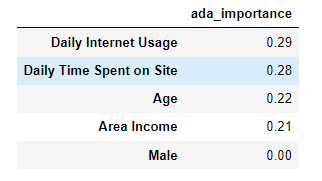

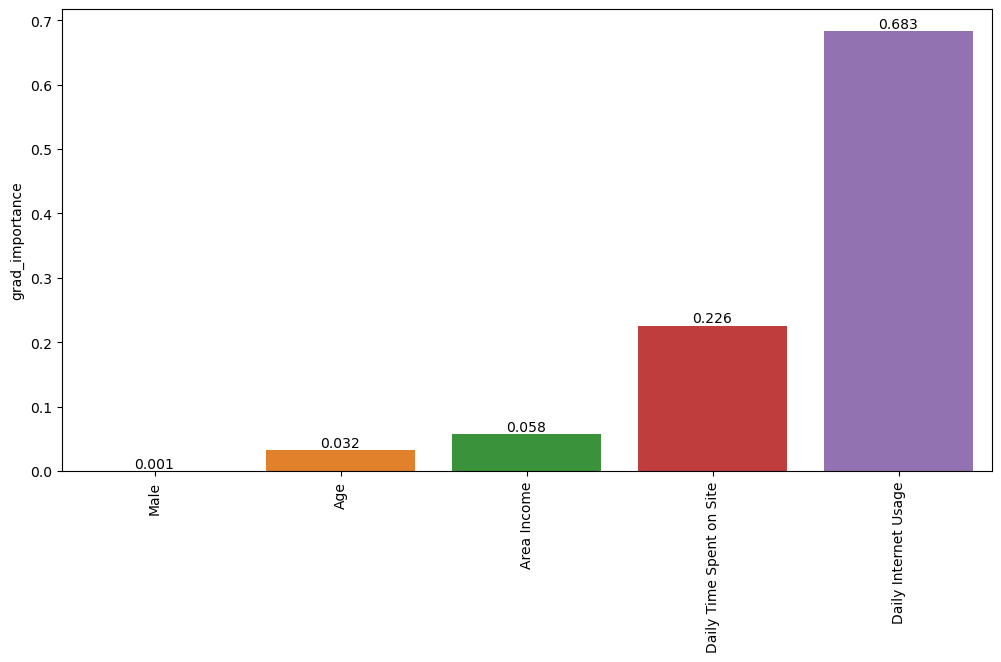

In [63]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grad_imp_feats,
                 x=grad_imp_feats.index,
                 y='grad_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.xticks(rotation=90);

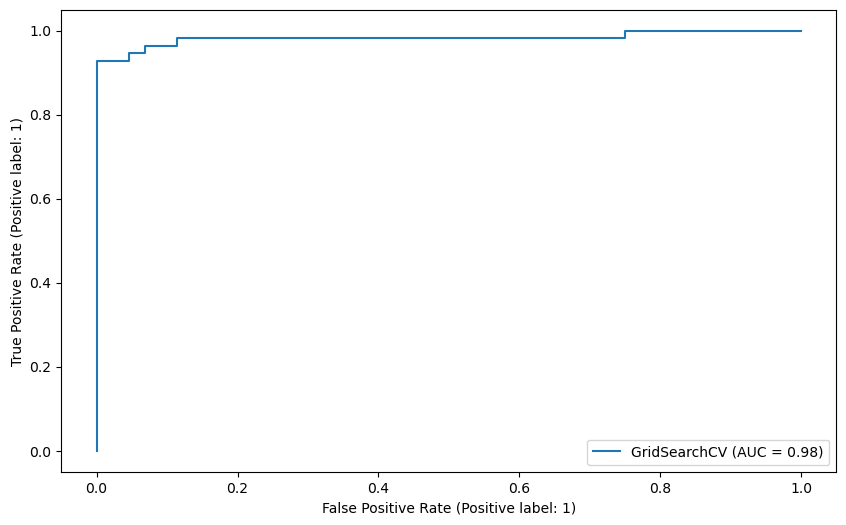

In [64]:
RocCurveDisplay.from_estimator(grid, X_test, y_test);

In [ ]:
# pip install xgboost

In [65]:
from xgboost import XGBClassifier

In [66]:
xgb = XGBClassifier(random_state = 42).fit(X_train, y_train)

In [67]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [68]:
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [2, 3, 4],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.5, 0.8],
    "colsample_bytree": [0.5, 0.8]
}

In [69]:
xgb_model = XGBClassifier(random_state=42)

In [70]:
xgb_grid = GridSearchCV(xgb_model,
                        param_grid,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

In [71]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 2,
 'n_estimators': 100,
 'subsample': 0.8}

In [72]:
xgb_grid.best_score_

0.968209761336929

In [73]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[452   4]
 [ 16 428]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.99      0.96      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



### Feature Importances

In [76]:
model = XGBClassifier(n_estimators= 100, colsample_bytree = 0.5, subsample= 0.8, learning_rate = 0.05,
                      max_depth= 2, random_state = 42)

model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

,xgb_importance
Male,0.01
Age,0.10
Area Income,0.13
Daily Time Spent on Site,0.37
Daily Internet Usage,0.40


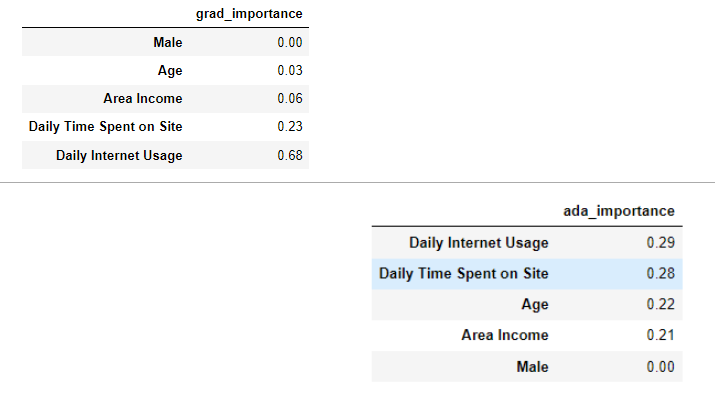

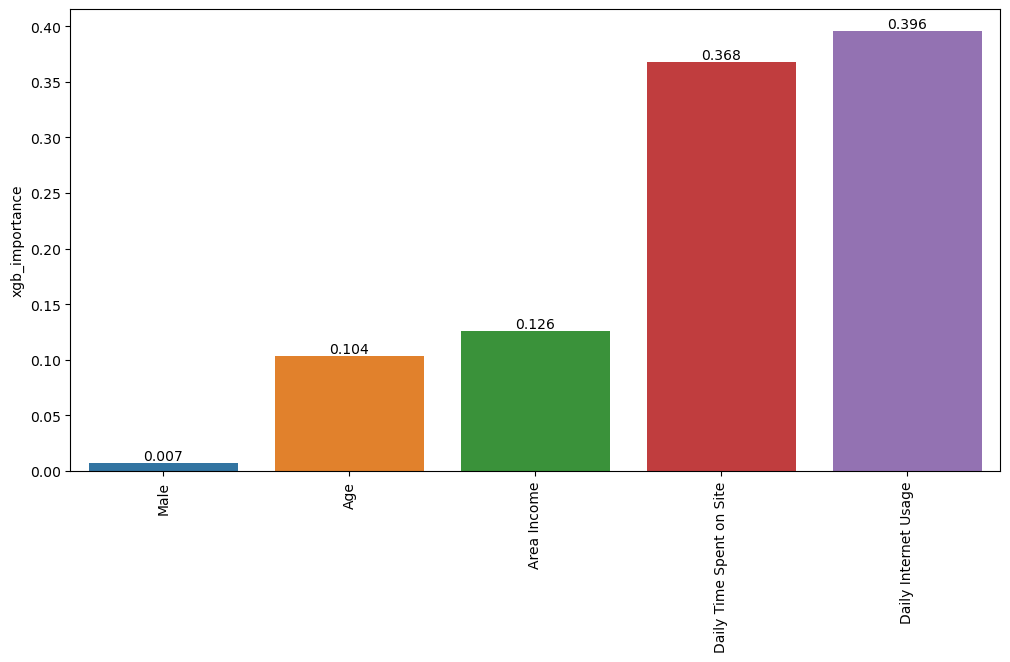

In [77]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.xticks(rotation=90);

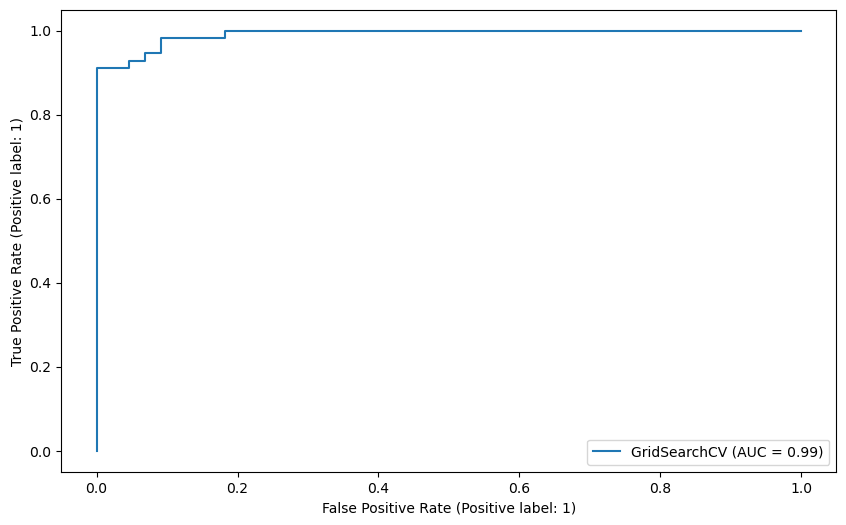

In [78]:
RocCurveDisplay.from_estimator(xgb_grid, X_test, y_test);

## Light GBM

**Light GBM (Light Gradient Boosting Machine)**, Microsoft tarafından 2017 yılında, XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen, yüksek verimlilik ve hızla büyük veri setleri üzerinde çalışabilen bir gradient boosting türüdür. Bu yöntem, özellikle büyük veri setlerinde ve karmaşık makine öğrenmesi problemlerinde popülerdir.

**Light GBM'in Özellikleri**
**Hızlı Eğitim ve Tahmin Süreleri**: Light GBM, veri setlerini hızlı bir şekilde işleyebilir ve bu nedenle büyük veri setleri üzerinde çalışırken zaman tasarrufu sağlar. 9K-10K altındaki veri setleri için iyi bir tercih olmayabilir. Sebebi ise küçük veri setlerinde, overfitting yatkınlığı olmasından dolayıdır. Kısaca Light GBM i büyük data setlerinde tavsiye ederim.

**Düşük Hafıza Kullanımı**: Optimizasyon teknikleri sayesinde, Light GBM diğer gradient boosting çerçevelerine göre daha az hafıza kullanır.

**Yüksek Performans**: Light GBM, gelişmiş algoritmaları sayesinde yüksek doğruluk oranları elde eder ve genellikle diğer geleneksel gradient boosting yöntemlerine göre daha iyi sonuçlar verir.

**Desteklediği Özellikler**: Kategorik özelliklerin (categorical features) doğrudan işlenmesi ve veri setlerindeki eksik değerlerle (missing values) başa çıkabilme yeteneği.

**Not**: Her ne kadar basit bir implementasyon olsa da içinde 100'den fazla parametre barındırdığı için implementasyon öncesinde ilgili dökümanları okuyarak en azından bu parametrelerin ne olduğunu anlamakta fayda var.

DOKÜMAN LİNK: https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst


**Light GBM'in Çalışma Prensibi**
Light GBM, diğer gradient boosting yöntemlerinden farklı olarak, ağaçları yaprak odaklı (leaf-wise) büyütür. Bu, veri setinin alt kümelerini eğitim sırasında daha dengeli bir şekilde böler ve böylece modelin daha az hata yapmasını sağlar. Bu yöntem, özellikle veri seti büyüdükçe diğer metodlara (level-wise) göre daha etkili olabilir.

**Light GBM'in Kullanım Alanları**
Büyük Veri Setleri: Light GBM, büyük ve karmaşık veri setlerinde etkili bir şekilde çalışabilir.
Yüksek Performans Gerektiren Uygulamalar: Gerçek zamanlı uygulamalar veya yüksek doğruluk gerektiren görevler için uygundur.
Çeşitli Problemler: Hem sınıflandırma hem de regresyon problemlerinde kullanılabilir.

**Sonuç**
Light GBM, yüksek verimlilik, hız ve doğruluk sunarak, özellikle büyük ve karmaşık veri setlerinde kullanılmak üzere tasarlanmış güçlü bir makine öğrenmesi aracıdır. Farklı problemlerde ve büyük veri setlerinde etkili sonuçlar almak isteyen araştırmacılar ve geliştiriciler için ideal bir seçenektir.


GBM = Desicion Tree + Boosting + Gradient Descent

LightGBM = GBM + GOSS + EFB


LightGBM (Light Gradient Boosting Machine), C++ programlama dilinde yazılmış açık kaynaklı bir makine öğrenimi kütüphanesidir. 

LightGBM, Microsoft tarafından geliştirilmiştir ve özellikle büyük veri setleri üzerinde hızlı ve etkili bir şekilde çalışmak üzere tasarlanmıştır. LightGBM, diğer popüler gradient boosting kütüphanelerinden (örneğin, XGBoost) daha hızlı eğitim süreleri sunabilen bir dağıtılmış eğitim algoritması kullanır.

LightGBM, C++ tabanlı bir çekirdek üzerine inşa edilmiştir, ancak Python, R, Java, ve diğer birçok programlama dilinde kullanım için çeşitli dil bağlayıcıları ve arabirimleri bulunmaktadır. Bu sayede, LightGBM'i tercih ettiğiniz programlama dilinde kullanabilirsiniz.


LightGBM’de aşırı öğrenmeyi engellemek için learning_rate, max_dept, num_leaves, min_data_in_leaf parametreleri, öğrenim süresini hızlandırmak için feature_fraction, bagging_fraction ve num_iteration parametreleri optimize edilebilir.

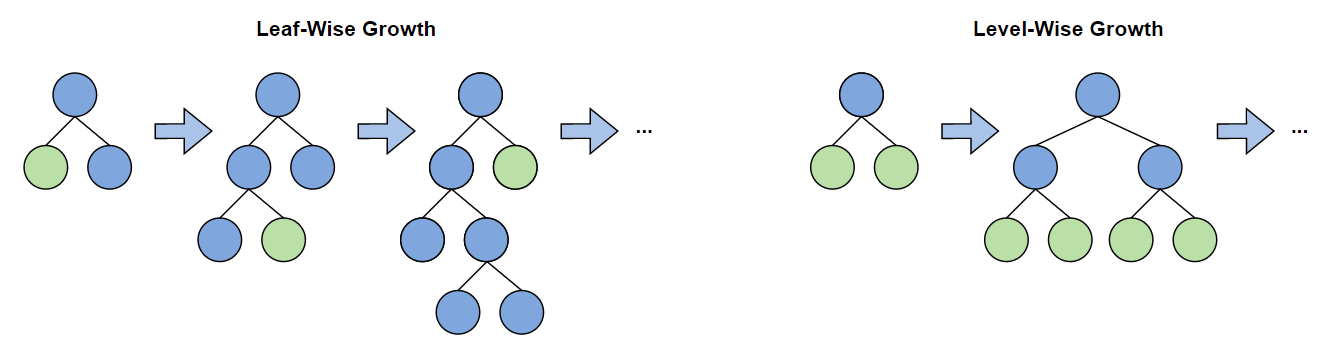

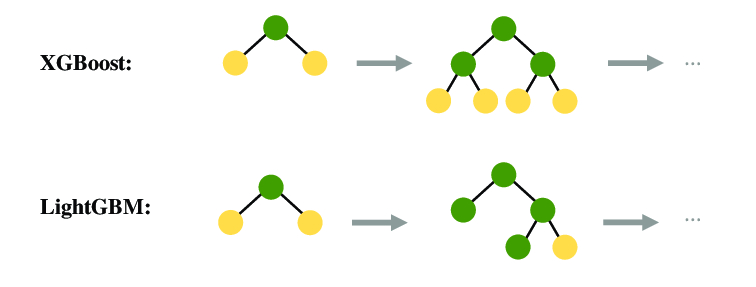

In [ ]:
# pip install lightgbm

In [79]:
from lightgbm import LGBMClassifier

In [80]:
lgbm_model = LGBMClassifier(random_state=42).fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [81]:
eval_metric(lgbm_model, X_train, y_train, X_test, y_test)

Test_Set
[[42  2]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        44
           1       0.96      0.93      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



### Light GBM Model Tuning - Gridsearch

In [82]:
param_grid = {
    'learning_rate': [0.1, 1],
    'n_estimators': [50, 100, 200],
    'num_leaves': [20, 30, 50],  
    'max_depth': [-1, 3, 4, 5],     
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [83]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_grid = GridSearchCV(estimator=lgbm_model,
                         param_grid=param_grid,
                         cv=5,
                         scoring='f1',
                         n_jobs=-1,
                         return_train_score=True).fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [84]:
lgbm_grid.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 50,
 'num_leaves': 20,
 'subsample': 0.8}

In [85]:
lgbm_grid.best_score_

0.9604055465196243

In [86]:
y_pred = lgbm_grid.predict(X_test)

lgbm_f1 = f1_score(y_test, y_pred)
lgbm_recall = recall_score(y_test, y_pred)
lgbm_auc = roc_auc_score(y_test, y_pred)

eval_metric(lgbm_grid, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[455   1]
 [  9 435]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       1.00      0.98      0.99       444

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



### Feature Importances

In [87]:
model = LGBMClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['lgbm_importance'])
lgbm_imp_feats = feats.sort_values("lgbm_importance")
lgbm_imp_feats


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,lgbm_importance
Male,93
Age,509
Daily Time Spent on Site,707
Daily Internet Usage,821
Area Income,854


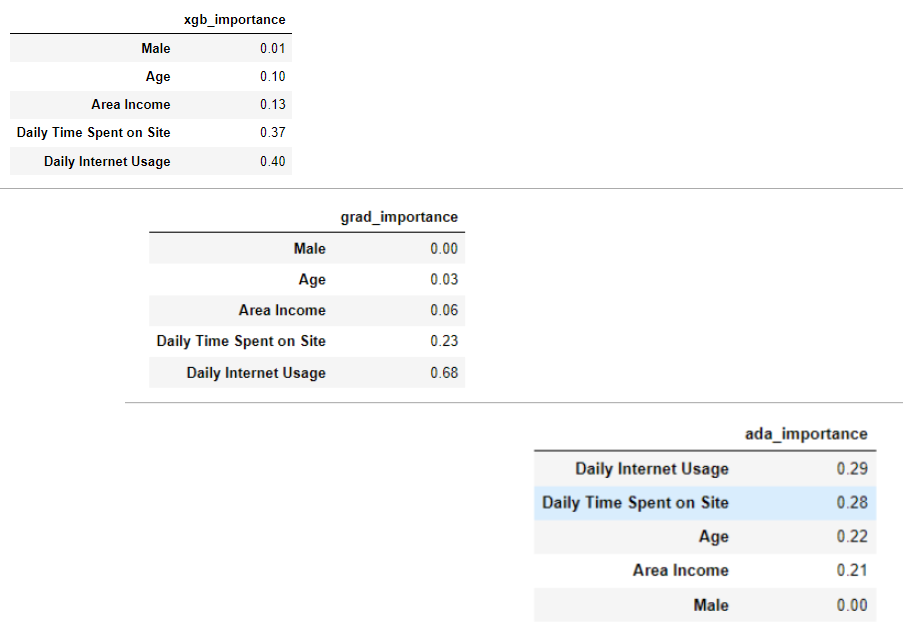

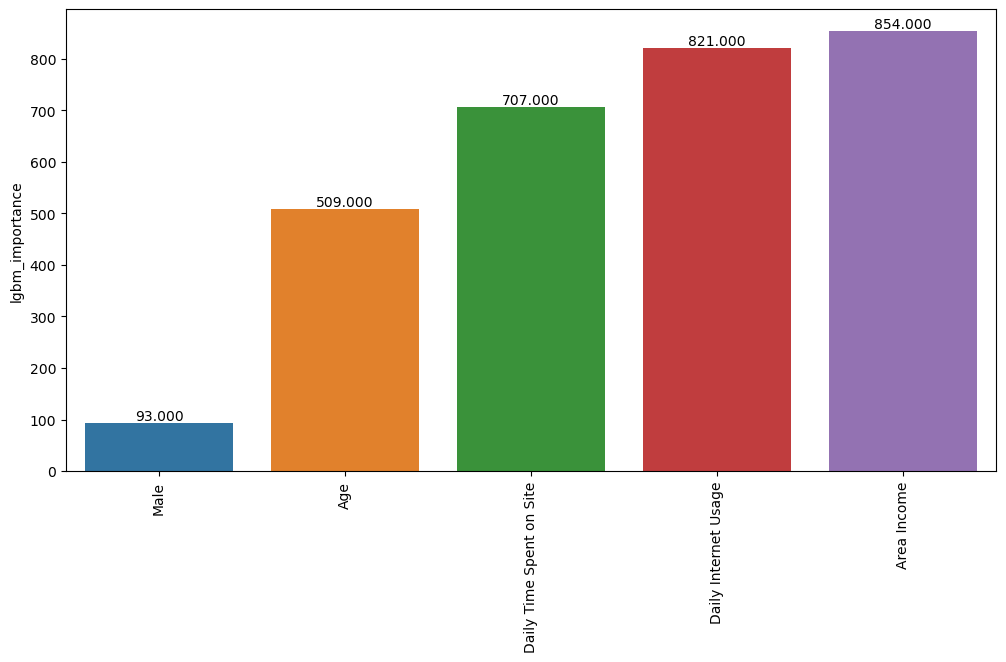

In [88]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=lgbm_imp_feats, x=lgbm_imp_feats.index, y='lgbm_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.xticks(rotation=90);

## Random Forests

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[38  6]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.90      0.96      0.93        56

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## Logistic Regression

In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [92]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[43  1]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.98      0.95      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[451   5]
 [ 22 422]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       456
           1       0.99      0.95      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[454   2]
 [ 24 420]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       456
           1       1.00      0.95      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## SVM

In [94]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[450   6]
 [ 17 427]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## Comparing Models

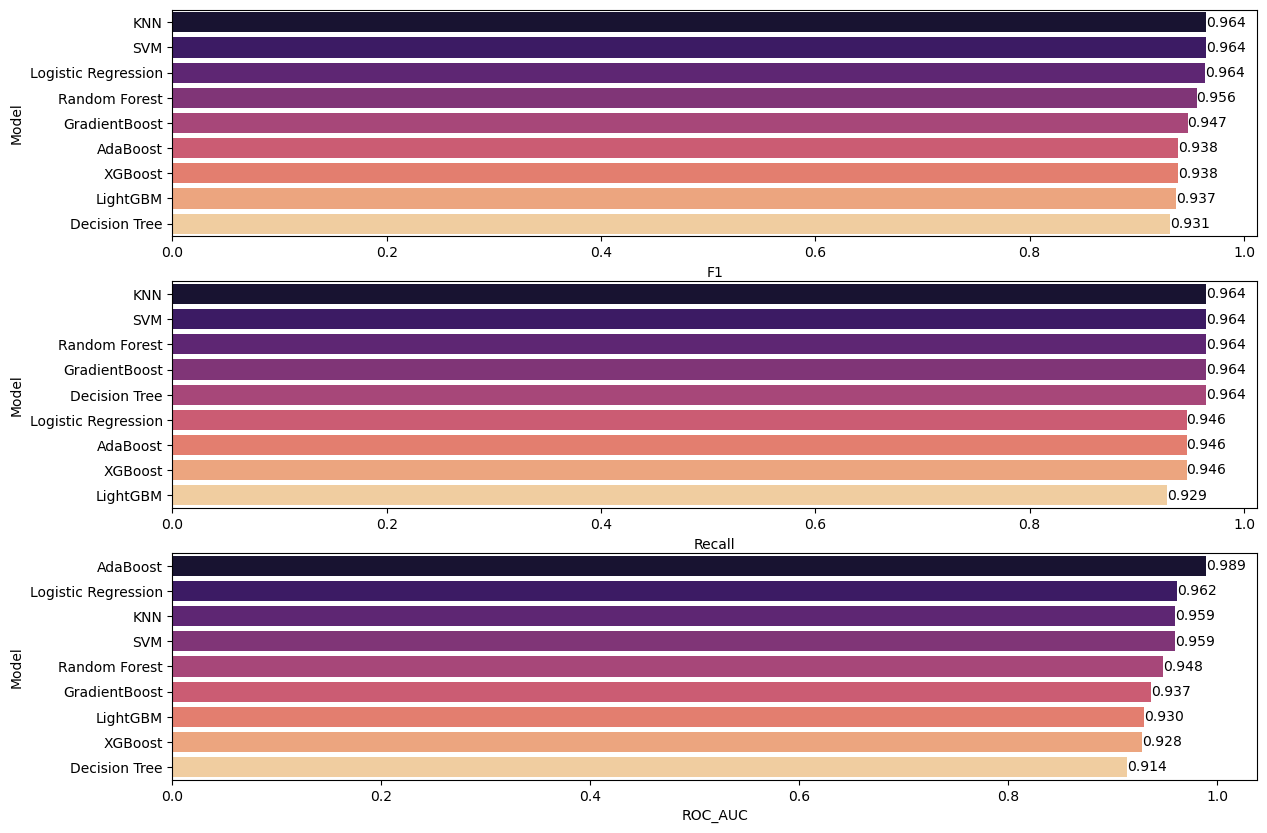

In [95]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost", "LightGBM"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1, lgbm_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gb_recall, xgb_recall, lgbm_recall],
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc, lgbm_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="magma")
labels(ax)
plt.show()

In [ ]:
# pip install lazypredict

In [96]:
from lazypredict.Supervised import LazyClassifier

In [98]:
pd.set_option('display.max_columns', None)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:01<00:00, 16.25it/s]

[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 